## CHME0031: Programming with Python for Health Research
### 2022-2023

### Introduction 
The World Health Organization (WHO) Mortality database of registered deaths contains data obtained from national authorities around the word. Mortalities are classified using code from the 9th and 10th version of the International Classification of Diseases (ICD-9 and ICD-10); the code corresponds to the circumstance that led to death. Additional sources of information, such as country code, population size, sex, age, and economic parameters, are included in additional datasets. The goal of this report is to review, document, and assess certain parameters of WHO mortality data, with particular focus paid to infectious disease and the impact of the COVID-19 pandemic.

In [1]:
#preliminaries
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

import math
import numpy as np
import datetime
import re
import matplotlib as mpl

### Overview of data

In [2]:
#reading in csv files
#will have to combine ICD10 files as original zip had all 5

mort_country_codes = pd.read_csv("mort_country_codes.zip")
mort_pop = pd.read_csv("mort_pop.zip")
morticd9 = pd.read_csv("morticd09.zip")
mort1 = pd.read_csv("morticd10_part1.zip")
mort2 = pd.read_csv("morticd10_part2.zip")
mort3 = pd.read_csv("morticd10_part3.zip")
mort4 = pd.read_csv("morticd10_part4.zip")
mort5 = pd.read_csv("morticd10_part5.zip")
addinfo = pd.read_csv("Additional_info.csv")

#Prior to analysis, the dataframes need to be exaimined. 
#This is to evaluate what types of data are represented and whether or not there are any missing values.

/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Exploring Country codes & names DF 
#print(mort_country_codes.head())
#print(mort_country_codes.info())
#print(mort_country_codes.isnull().sum())

In [4]:
# Exploring population size info DF
#print(mort_pop.head())
#print(mort_pop.info())
#print(mort_pop.isnull().sum())
#print(mort_pop.describe().T)
#need to join mort_pop and mort_country on country colomn to peform #Q1

In [5]:
# Exploring mortality data with death causes coded in ICD-9
#print(morticd9.head())
#print(morticd9.info())
#print(morticd9.isnull().sum())

In [6]:
# Exploring mort1 DF
#print(mort1.head())
#print(mort1.info())
#print(mort1.isnull().sum())

In [7]:
# Exploring mort2 DF
#print(mort2.head())
#print(mort2.info())
#print(mort2.isnull().sum())

In [8]:
# Exploring mort3 DF
#print(mort3.head())
#print(mort3.info())
#print(mort3.isnull().sum())

In [9]:
# Exploring mort4 DF
#print(mort4.head())
#print(mort4.info())
#print(mort4.isnull().sum())

In [10]:
# Exploring mort5 DF
#print(mort5.head())
#print(mort5.info())
#print(mort5.isnull().sum())

In [11]:
# Exploring Information about variables
#print(addinfo.head())
#print(addinfo.info())
#print(addinfo.isnull().sum())

### Question 1. Population size

In [3]:
#pop1 is population at all ages, so groupby pop1 and sort by descending order 

mort_country_codes = mort_country_codes.rename(columns ={'country':'Country'})
mort_pop2 = pd.merge(mort_country_codes, mort_pop, how ='inner', on = 'Country')
mort_pop2.head()

#NB: original mort_pop does not appear to contain data for the UAE

,Country,name,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,Cape Verde,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,Cape Verde,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,Egypt,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,Egypt,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,Egypt,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [4]:
#remove UK countries from population dataframe - do not want duplicate counts 
uk_countries = ['United Kingdom, England and Wales', 'United Kingdom, Northern Ireland', 'United Kingdom, Scotland']
mort_pop2 = mort_pop2[mort_pop2.name.isin(uk_countries) == False]
mort_pop2

,Country,name,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,Cape Verde,NaN,NaN,1980,1,7,1.371000e+05,3400.000000,15800.000000,...,NaN,5300.000000,NaN,2900.000000,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,Cape Verde,NaN,NaN,1980,2,7,1.590000e+05,4000.000000,18400.000000,...,NaN,6200.000000,NaN,3400.000000,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,Egypt,NaN,NaN,1955,1,2,5.051500e+06,150300.000000,543400.000000,...,110200.000000,51100.000000,41600.000000,14300.000000,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,Egypt,NaN,NaN,1955,2,2,5.049400e+06,145200.000000,551000.000000,...,122100.000000,51100.000000,50700.000000,15800.000000,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,Egypt,NaN,NaN,1956,1,2,5.353700e+06,158700.000000,576600.000000,...,116900.000000,54100.000000,44000.000000,14900.000000,12400.0,26600.0,NaN,NaN,0.0,250022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9916,5198,Solomon Islands,NaN,NaN,2017,2,3,3.191926e+05,8018.862999,7989.670031,...,6239.247979,5062.873097,3601.905772,4347.471504,NaN,NaN,NaN,NaN,0.0,NaN
9917,5198,Solomon Islands,NaN,NaN,2018,1,3,3.405205e+05,8630.009820,8552.239421,...,6587.270532,5109.808634,3482.798415,4450.304553,NaN,NaN,NaN,NaN,0.0,NaN
9918,5198,Solomon Islands,NaN,NaN,2018,2,3,3.260365e+05,8015.096596,7986.494468,...,6422.052069,5257.338854,3744.042066,4552.898314,NaN,NaN,NaN,NaN,0.0,NaN
9919,5200,Tonga,NaN,NaN,2003,1,4,5.171100e+04,1156.000000,5045.000000,...,1390.000000,1193.000000,859.000000,952.000000,NaN,NaN,NaN,NaN,0.0,1433.0


In [5]:
#find all 2020 values...mortpop_20 is mortalities + population of 2020
#need to combine sex for countries. 
mortpop_20 = mort_pop2[mort_pop2['Year'] == 2020].iloc[:, 0:8].copy(deep = True)

#isolating pop1 as this is population total
mortpop_20.head(5)

,Country,name,Admin1,SubDiv,Year,Sex,Frmat,Pop1
244,1300,Mauritius,NaN,NaN,2020,1,1,626028.000
245,1300,Mauritius,NaN,NaN,2020,2,1,639712.000
3093,3150,Israel,NaN,NaN,2020,1,2,4575578.957
3094,3150,Israel,NaN,NaN,2020,2,2,4639538.235
3411,3285,Oman,NaN,NaN,2020,1,0,2857055.000


In [6]:
#totalpop is the total population dataframe
totalpop = mortpop_20.groupby(mortpop_20.name).apply(lambda x: x['Pop1'].sum())

#total population is sorted
totalpop_sorted = totalpop.sort_values(axis = 0, ascending = False, kind = 'quicksort', na_position = 'last')

#top population values and bottom populations will be found. bottom values will then be sorted. 
top10 = totalpop_sorted.head(10)
bottom10 = totalpop_sorted.tail(10)
print(top10)
print(bottom10.sort_values(axis = 0, ascending = True))

name
Germany              83160871.0
United Kingdom       67078534.0
Republic of Korea    51349259.0
Spain                47355684.0
Ukraine              41575748.0
Australia            25687041.0
Kazakhstan           18755665.5
Netherlands          17512079.5
Belgium              11544256.0
Czech Republic       10700155.0
dtype: float64
name
San Marino           33615.0
Monaco               37309.0
Andorra              82317.5
Iceland             366463.0
Mauritius          1265740.0
Latvia             1900449.0
North Macedonia    2072531.0
Slovenia           2100126.0
Lithuania          2794885.0
Qatar              2833681.0
dtype: float64


In the year 2020, the countries with the top 5 largest reported population were Germany, (n=83160871), United Kingdom (inclusive of England and Wales, Scotland, and Northern Ireland) (n=67078534), the Republic of Korea (n=51349259), Spain (n=47355684), and Ukraine (n=41575748). The countries with the top 5 smallest record population were San Marino (n=33615),  Monaco (n=37309), Andorra (n=82317), Iceland (n=366463), and Mauritius (n=1265740).

### Question 2. ICD-9 causes of death in the UK in 1999 

In [7]:
#United Kingdom country code = 4308 (inclusive of England and Wales, Scotland, and Northern Ireland)
country_code = 4308
year = 1999

#isolate UK data 
uk_data = morticd9[(morticd9['Country'] == country_code) & (morticd9['Year'] == year)].copy(deep=True)

uk_data['List'].value_counts() #look at 09B 

#uk_data.isnull().sum()
print(uk_data['Cause'].value_counts())

#392 different causes each with 1-2 value counts - need to group by generic condition

140     2
B302    2
B300    2
B30     2
B299    2
       ..
B360    1
B36     1
B113    1
1877    1
187     1
Name: Cause, Length: 392, dtype: int64


In [8]:
#create list of cause IDs and new condition list
code_list = list(uk_data['Cause'])
condition = []

#create for loop to append condition name to condition list
for code in code_list:
    if re.findall('B00', code):
        condition.append('all_causes')
    elif re.findall('B0[0-7]{1}[0-9]{0,1}', code):
        condition.append('infectious_parasitic_disease')
    elif re.findall('B0[8-9]{1}[0,9]{0,1}', code) or re.findall('B1[0-4]{1}[0-9]{0,1}', code):
        condition.append('malignant_neoplasm_primary')
    elif re.findall('B15[0-9]{0,1}', code):
        condition.append('benign_neoplasm') 
    elif re.findall('B16', code):
        condition.append('carcinoma_in_situ')
    elif re.findall('B17', code):
        condition.append('other_and_unspecified_neoplasm')
    elif re.findall('B18[0-9]{0,1}', code):
        condition.append('immunity_disorders') 
    elif re.findall('B19[0-9]{0,1}', code):
        condition.append('nutritional_deficiencies')
    elif re.findall('B20[0-9]{0,1}', code):
        condition.append('diseases_of_blood') 
    elif re.findall('B21[0-9]{0,1}', code):
        condition.append('mental_disorders')
    elif re.findall('B22[0-9]{0,1}', code):
        condition.append('diseases_of_nervous system') 
    elif re.findall('B23[0-9]{0,1}', code):
        condition.append('disorders_of_eye_adnexa')
    elif re.findall('B24[0-9]{0,1}', code):
        condition.append('diseases_of_ear_mastoidprocess') 
    elif re.findall('B2[5-8]{1}[0-9]{0,1}', code):
        condition.append('heart_disease')
    elif re.findall('B29[0-9]{0,1}', code):
        condition.append('cerebrovascular_disease')
    elif re.findall('B30[0-9]{0,1}', code):
        condition.append('other_diseases_circulatory')
    elif re.findall('B3[1-2]{1}[0-9]{0,1}', code):
        condition.append('respiratory')
    elif re.findall('B33[0-9]{0,1}', code):
        condition.append('oralcavity_salivaryglands_jaws')
    elif re.findall('B34[0-9]{0,1}', code):
        condition.append('other_digestive system')
    elif re.findall('B35[0-9]{0,1}', code):
        condition.append('urinary_system')
    elif re.findall('B36[0-9]{0,1}', code):
        condition.append('male_genital_organs')
    elif re.findall('B37[0-9]{0,1}', code):
        condition.append('female_genital_organs') 
    elif re.findall('B3[8-9]{1}[0-9]{0,1}', code) or re.findall('B4[0-2]{1}[0-9]{0,1}', code) or re.findall('B45[0-9]{0,1}', code):
        condition.append('obstetric')      
    elif re.findall('B43[0-9]{0,1}', code):
        condition.append('musculoskeletal_connectivetissue')
    elif re.findall('B44[0-9]{0,1}', code):
        condition.append('congenital_anomalies')
    elif re.findall('B46[0-9]{0,1}', code):
        condition.append('illdefined_conditions')
    elif re.findall('B4[7-9]{1}[0-9]{0,1}', code) or re.findall('B5[0-2]{1}[0-9]{0,1}', code):
        condition.append('accidents')
    elif re.findall('B53', code):
        condition.append('drugs_medicaments_adverse')
    elif re.findall('B5[4-6]{1}[0-9]{0,1}', code):
        condition.append('injuries_violence')
    elif re.findall('1[4-9]{1}[0-9]{0,1}', code):
        condition.append('malignant_neoplasm_2')
    elif re.findall('20[0-8]{1}[0,2]{0,1}', code):
        condition.append('sarcoma_myeloma_leuk')
    elif re.findall('23[5-9]{0,1}', code):
        condition.append('uncertain_neoplasm') 
    elif re.findall('41[5-6]{0,1}', code) or code == '420+':
        condition.append('other_pulmonary_heart')
    else:
        condition.append('Nan')

#create new column that will take condition list as its values 
uk_data['condition'] = condition

In [9]:
#condition appears at the end of the dataframe 
uk_data.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,condition
742303,4308,NaN,NaN,1999,09B,140,1,1,1,14,...,1.0,4.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,malignant_neoplasm_2
742304,4308,NaN,NaN,1999,09B,140,2,1,1,12,...,2.0,7.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,malignant_neoplasm_2
742305,4308,NaN,NaN,1999,09B,141,1,1,1,281,...,18.0,17.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,malignant_neoplasm_2
742306,4308,NaN,NaN,1999,09B,141,2,1,1,171,...,25.0,41.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,malignant_neoplasm_2
742307,4308,NaN,NaN,1999,09B,1410,1,1,1,17,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,malignant_neoplasm_2


In [10]:
#a new dataframe, uk_age, will be created from a deep copy of uk_data 
# uk_age will drop columns not associated with age-related mortality or condition
uk_age = uk_data.copy(deep = True)
uk_age = uk_age.drop(columns = ['Country','Admin1','SubDiv','Year','List','Cause','Frmat','IM_Frmat','Deaths24','Deaths25', 'Deaths26'])

#Na values will be replaced with 0 so that values can be added together.
uk_age = uk_age.fillna(0) 
uk_age

,Sex,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,...,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,condition
742303,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,1.0,4.0,0.0,0.0,0.0,0.0,malignant_neoplasm_2
742304,2,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,2.0,7.0,0.0,0.0,0.0,0.0,malignant_neoplasm_2
742305,1,281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,37.0,26.0,18.0,17.0,0.0,0.0,0.0,0.0,malignant_neoplasm_2
742306,2,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,16.0,18.0,25.0,41.0,0.0,0.0,0.0,0.0,malignant_neoplasm_2
742307,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,malignant_neoplasm_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743038,2,627,9.0,2.0,2.0,1.0,1.0,2.0,5.0,31.0,...,34.0,37.0,24.0,17.0,28.0,0.0,0.0,2.0,7.0,injuries_violence
743039,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,injuries_violence
743040,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,injuries_violence
743041,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,injuries_violence


In [11]:
# creating new columns that contain moratlity data by age group (19 years)
uk_age['deaths_all_ages'] = uk_age['Deaths1']
uk_age['deaths_1_19_years'] = (uk_age['Deaths3'] + \
       uk_age['Deaths4'] + uk_age['Deaths5'] + \
       uk_age['Deaths6'] + uk_age['Deaths8'] + uk_age['Deaths9'])
uk_age['deaths_20_39_years'] = (uk_age['Deaths10'] + uk_age['Deaths11'] + uk_age['Deaths12'] + 
       uk_age['Deaths13'])
uk_age['deaths_40_59_years'] = (uk_age['Deaths14'] + uk_age['Deaths15'] + uk_age['Deaths16'] + uk_age['Deaths17'])
uk_age['deaths_60_79'] = (uk_age['Deaths18'] + uk_age['Deaths19'] + uk_age['Deaths20'] + uk_age['Deaths21'])
uk_age['deaths_80_years_plus'] = (uk_age['Deaths22'] + uk_age['Deaths23'])
uk_age['deaths_0_364_days'] = (uk_age['Deaths2'] + uk_age['IM_Deaths1'] + uk_age['IM_Deaths2'] + uk_age['IM_Deaths3'] + uk_age['IM_Deaths4'])

In [12]:
#isolating age group categories and creating a new dataframe, which only includes
#mortality rates by 19 year age category 
uk_agecat = uk_age.drop(uk_age.iloc[:,1:28],axis = 1)

In [13]:
#creating separate male and female dataframes from
uk_male =  uk_agecat[uk_age['Sex'] == 1]
uk_female = uk_agecat[uk_age['Sex'] == 2]

#want dataframes of equal length - adding missing condition to female dataframe
df2 = {'condition': 'male_genital_organs', 'Sex': 2, 'Deaths1': 0}
uk_female = uk_female.append(df2, ignore_index = True)

#finding the total of all deaths related to a specific condition by sex
uk_male = uk_male.groupby(['condition']).apply(lambda x: x.iloc[:,2:-1].sum()).reset_index()
uk_female = uk_female.groupby(['condition']).apply(lambda x: x.iloc[:,2:-1].sum()).reset_index()

#sorting values in descending order to find top conditions by sex 
male_mort = uk_male.set_index('condition')['deaths_all_ages'].sort_values(axis = 0, ascending=False)
female_mort = uk_female.set_index('condition')['deaths_all_ages'].sort_values(axis = 0, ascending=False)

print(male_mort.head(11))
print(female_mort.head(11))

condition
all_causes                    300368.0
heart_disease                 172530.0
malignant_neoplasm_primary    156335.0
respiratory                    97838.0
cerebrovascular_disease        47648.0
other_digestive system         22852.0
malignant_neoplasm_2           20270.0
other_diseases_circulatory     19334.0
accidents                      11741.0
diseases_of_nervous system     10814.0
mental_disorders                9536.0
Name: deaths_all_ages, dtype: float64
condition
all_causes                    331694.0
heart_disease                 162544.0
malignant_neoplasm_primary    146635.0
respiratory                   121776.0
cerebrovascular_disease        81386.0
other_digestive system         27098.0
malignant_neoplasm_2           23696.0
illdefined_conditions          23464.0
other_diseases_circulatory     17244.0
mental_disorders               16992.0
diseases_of_nervous system     12056.0
Name: deaths_all_ages, dtype: float64


In [14]:
#whether or not to include all causes in analysis --> assuming that all causes are deaths that
#weren't given a code, but were still recorded  (too many to discount)

# sum of deahts (exclusive of all_causes) 
test = uk_male.loc[uk_male['condition'] != 'all_causes']
print(test['deaths_all_ages'].sum())

#sum of deaths for all_causes 
test2 = uk_male.loc[uk_male['condition'] == 'all_causes']
print(test2['deaths_all_ages'].sum()) 

#the numbers are not the same and there is not enough information on 'all_causes' to 
#further consider it in this analysis

629802.0
300368.0


In [15]:
#Top 3 conditions by pie charts (men and women, respectfully 
uk_male_top3 = uk_male[(uk_male['condition'] == 'heart_disease') | (uk_male['condition'] == 'malignant_neoplasm_primary')|(uk_male['condition'] == 'respiratory')].copy(deep=True)
uk_female_top3 = uk_female[(uk_female['condition'] == 'heart_disease')| (uk_female['condition'] == 'malignant_neoplasm_primary')|(uk_female['condition'] == 'respiratory')].copy(deep=True)

In [16]:
#dropping all age deaths because we want to see comparision between age groups 
uk_male_top3 = uk_male_top3.drop('deaths_all_ages', axis = 1)
uk_female_top3 = uk_female_top3.drop('deaths_all_ages', axis = 1)

In [17]:
#resetting the index to condition 
uk_male_top3 = uk_male_top3.set_index('condition')
uk_female_top3 = uk_female_top3.set_index('condition')

In [18]:
#unstack values so that columns can be renamed
#Agecat stands for age category 
#Deaths represent cumulative deaths 
ukm = uk_male_top3.unstack()
ukm = ukm.reset_index()
ukm = ukm.rename(columns = {'level_0':'Agecat', 0:'Deaths'})

ukf = uk_female_top3.unstack()
ukf = ukf.reset_index()
ukf = ukf.rename(columns = {'level_0':'Agecat', 0:'Deaths'})

In [19]:
# Group age_cat and condition and sum deaths
ukm_grouped = ukm.groupby(['Agecat', 'condition']).apply(lambda x: x['Deaths'].sum()).reset_index()

#removing 'deaths_0_364_days' and 'deahths_1_19_years' for visualization purposes only
#values will get lost within the graph
ukm_grouped = ukm_grouped[(ukm_grouped['Agecat'] != 'deaths_0_364_days') & (ukm_grouped['Agecat'] != 'deaths_1_19_years')]

# Create a pivot table from ukm_grouped
ukm_table = pd.pivot_table(ukm_grouped, index = ['condition'], columns = ['Agecat'])

# Delete columns with Na values and convert values to integers
ukm_table = ukm_table.dropna(axis = 1).astype(int)
#ukm_table

In [20]:
# Group age_cat and condition and sum deaths
ukf_grouped = ukf.groupby(['Agecat', 'condition']).apply(lambda x: x['Deaths'].sum()).reset_index()

#removing 'deaths_0_364_days' and 'deahths_1_19_years' for visualization purposes only
#values will get lost within the graph
ukf_grouped = ukf_grouped[(ukf_grouped['Agecat'] != 'deaths_0_364_days') & (ukf_grouped['Agecat'] != 'deaths_1_19_years')]

# Create a pivot table from ukf_grouped
ukf_table = pd.pivot_table(ukf_grouped, index = ['condition'], columns = ['Agecat'])

# Delete columns with Na values and convert values to integers
ukf_table = ukf_table.dropna(axis=1).astype(int)

Text(0, 50, 'Percentage of Female Deaths by Age Group in Top Causes of Mortality')

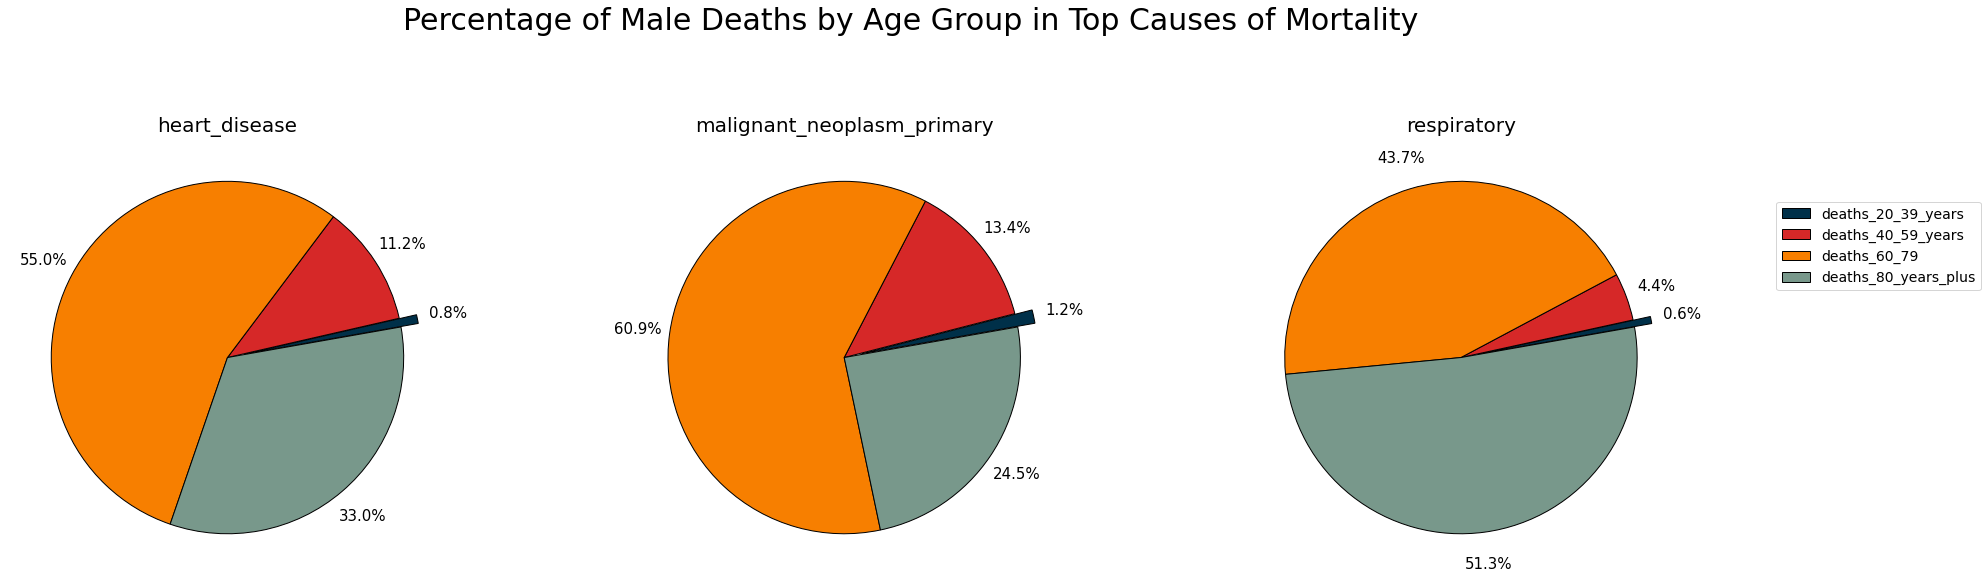

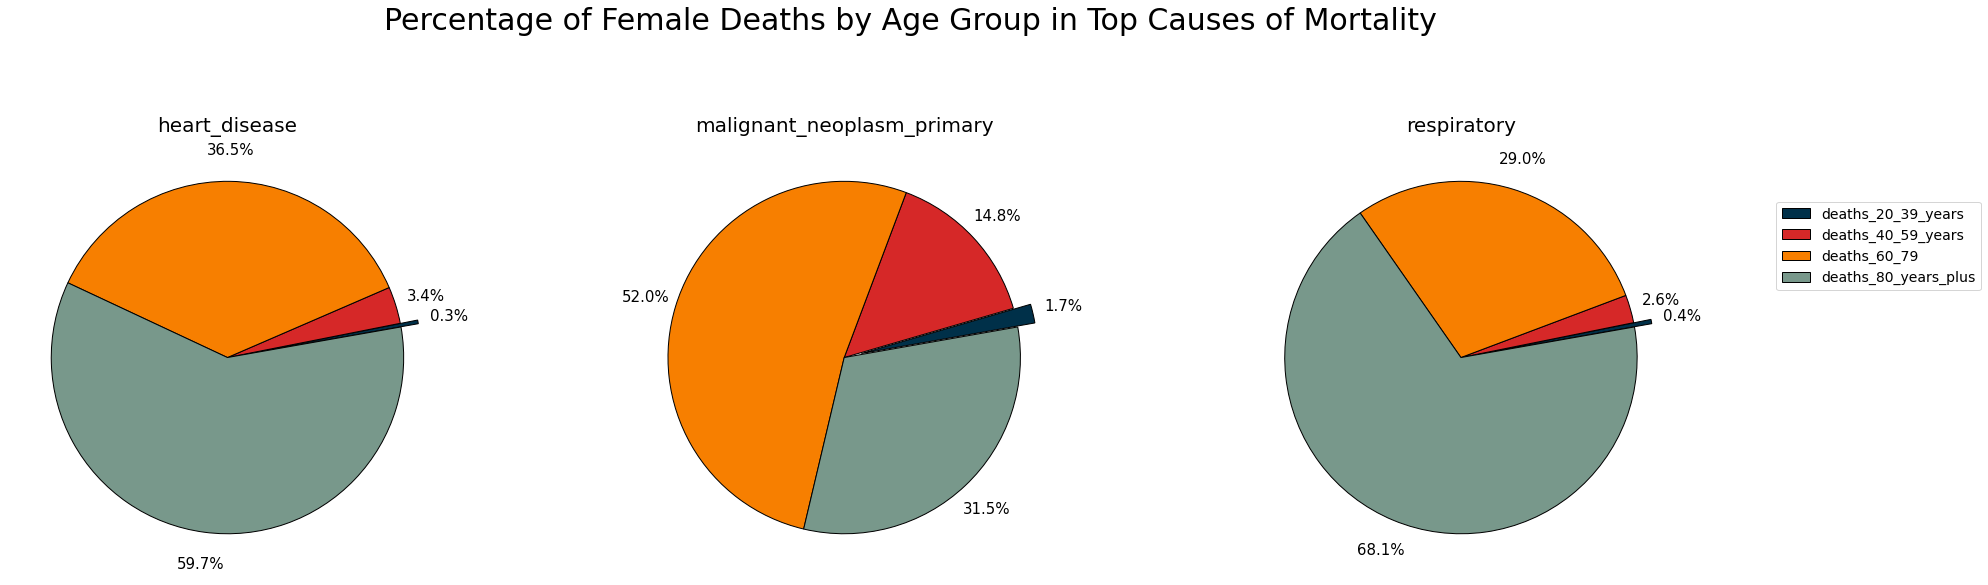

In [21]:
#male charts
colors_males = ['#003049', '#D62828', '#F77F00', '#78988B', '#FCBF49']
explode_males = [0.1,0,0,0]


fig, axes = plt.subplots(1, 3, figsize = (30, 30))

for i, (idx, row) in enumerate(ukm_table.iterrows()):
    ax = axes[i] #i correlates to number in subplot  
    ax.pie(row,  
           autopct = '%1.1f%%', #creates percentage from values in row
           pctdistance = 1.18, #distance from the center of chart, done for readability 
           explode = explode_males, #helps with readibility as well 
           startangle = 10, #determines from what angle the pie chart starts 
           colors = colors_males , #previously defined colors
           wedgeprops = {'edgecolor' : 'black'},
          textprops={'fontsize': 15})
    ax.set_title(idx, fontsize = 20, color = "black") #from the index, 'condition', a title will be set
    
    #row.index is 0, x[1] results in 'Agecat' column names, i.e. 'deaths_0_19'...
    legend = plt.legend([x[1] for x in row.index], 
                        bbox_to_anchor = (1.2, .87), # Legend position
                        loc = 'upper left',  
                        ncol = 1, 
                        fancybox = True,
                       fontsize = 14)

fig.subplots_adjust(hspace = 0.4, top = 0.85, wspace = 0.4) # Space between charts
#creation of a title as fig.suptitle creates a lot of white space between title and charts
ax.annotate('Percentage of Male Deaths by Age Group in Top Causes of Mortality', (-0.75, 1.15), xytext = (0, 50),
                   textcoords = 'offset points', xycoords = 'axes fraction',
                   ha = 'center', va = 'center', size = 30) 

#female charts
colors_females = ['#003049', '#D62828', '#F77F00', '#78988B', '#FCBF49']
explode_females = [0.1,0,0,0]
fig, axes = plt.subplots(1, 3, figsize = (30, 30))           
for i, (idx, row) in enumerate(ukf_table.iterrows()):
    ax = axes[i] #i correlates to number in subplot 
    ax.pie(row,
           autopct ='%1.1f%%', #creates percentage from values in row
           pctdistance = 1.18, #distance from the center of chart, done for readability
           startangle = 10, #helps with readibility as well 
           explode = explode_females, #determines from what angle the pie chart starts
           colors = colors_females,  #previously defined colors
           wedgeprops = {'edgecolor' : 'black'},
          textprops={'fontsize': 15})
    ax.set_title(idx, fontsize = 20, color = 'black')
    
    #row.index is 0, x[1] results in 'Agecat' column names, i.e. 'deaths_0_19'...
    legend = plt.legend([x[1] for x in row.index],
                        bbox_to_anchor =(1.2, .87), # Legend position
                        loc = 'upper left',  
                        ncol = 1, 
                        fancybox = True,
                       fontsize = 14)

fig.subplots_adjust(hspace = 0.4, top = 0.85, wspace = 0.4) # Space between charts
#creation of a title as fig.suptitle creates a lot of white space between title and charts
ax.annotate('Percentage of Female Deaths by Age Group in Top Causes of Mortality', (-0.75, 1.15), xytext = (0, 50),
                   textcoords ='offset points', xycoords ='axes fraction',
                   ha = 'center', va = 'center', size = 30)


Using ICD-9 data, the conditions that resulted in the highest mortalities in males in the United Kingdom in 1999 were as followed: heart disease, primary malignant neoplasm (MN), respiratory diseases, cerebrovascular diseases, and ‘other diseases of the digestive system’. For women the top five causes were the same. Deviance in similarities between the sexes did not occur until the 7th top cause of mortality. The top 7th cause of mortality in men was ‘diseases of the circulatory system’, while in women it was ‘ill-defined conditions.’ High incidence of circulatory system related deaths in men may be reflective of occupation. Men tend to favor jobs that require physical activity, such as factory or construction workers, that may put strain on the circulatory system, and thus increase risk of death. High incidence of ill-defined condition mortalities in women may reflect sex-based bias in health research. Historically, females have been understudied; there is a lack of literature or understanding of how disease manifest in them. Clinicians, having not the literature or knowledge, may determine cause of death as ill-defined. 

Top causes of death can further be analyzed by sub-setting deaths by age-group. The top three causes of death for both men and women (heart disease, MN, and respiratory diseases) will be displayed as pie charts. As most mortalities occurred in individuals 20 years or older, only data from these groups will be displayed. Age-group analysis shows difference in age proportions between men and women. For heart disease, the largest proportion of male deaths occurred in individuals aged 60-79 (60.90%) as opposed to females who saw the largest proportion occur in those aged 80+. In MN, both males and females saw the largest proportion of deaths in individuals aged 60-79 (60.9% and 52.0%, respectively). Lastly for respiratory diseases, both men and women saw the largest proportion of deaths in those aged 80+ (51.3%, 68.1%, respectfully). 

As one ages, the body becomes more susceptible to disease. The large proportion of mortalities occurring later in life for both men and women (60+ years) is reflected in the graphs. However, it is interesting to note that there is a higher proportion of older females (80+) dying of age-related causes, such as heart and respiratory diseases; this suggests that sex may be a protective factor. Moreover, the large proportion of MN-related deaths in individuals aged 60-79 years may be explained by the rapid rise in cancer incidence as age increases.

### Question 3. ICD-10 timeline plot

In [22]:
#files list is the list of csv files containing ICD-10 data
#creation of new list, morts (short for mortalities) to which csv files will be appended 
files = ["morticd10_part1.zip","morticd10_part2.zip","morticd10_part3.zip","morticd10_part4.zip","morticd10_part5.zip"]
morts = []

#a for loop is created to append files to morts list
for file in files:
    morts.append(pd.read_csv(file))

#concat list into new dataframe called morticd10 (contains mortality and ICD-10 data)
morticd10 = pd.concat(morts, ignore_index = True).copy(deep = True)
morticd10.head()

/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [23]:
#to get the number of unique rows merged to the dataframe
morticd10_sorted = morticd10.groupby(['Country'], as_index = False).nunique()
morticd10_sorted

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1060,0,0,2,1,275,2,2,2,63,...,17,17,22,0,0,12,20,0,7,9
1,1125,0,0,20,1,1577,2,3,3,2281,...,914,730,628,264,170,1,600,175,284,386
2,1250,0,0,2,1,645,2,1,1,142,...,41,41,49,0,0,19,66,0,0,0
3,1300,0,0,16,1,1735,2,1,1,308,...,115,106,93,70,50,6,21,33,27,27
4,1303,0,0,5,1,550,2,1,1,34,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,5020,0,0,22,1,5532,2,1,1,1352,...,473,537,577,497,349,18,76,48,46,86
139,5070,0,0,11,1,1365,2,1,2,231,...,69,64,58,38,36,24,37,13,28,38
140,5105,0,0,3,1,200,2,1,1,30,...,10,11,6,3,2,1,18,0,0,0
141,5150,0,0,17,1,3354,2,1,1,516,...,173,206,220,188,134,15,44,25,22,51


In [24]:
#merging country codes and morticd10 dataframes to get names of countries 
mort_pop10 = pd.merge(mort_country_codes, morticd10, on = 'Country').copy(deep = True)

#removing uk_countries from dataframe 
uk_countries = ['United Kingdom, England and Wales', 'United Kingdom, Northern Ireland', 'United Kingdom, Scotland']
mort_pop10 = mort_pop10[mort_pop10.name.isin(uk_countries) == False]

In [25]:
#isolating countries that contain the 'U' through use of a regex code. 
u_morticd10 = mort_pop10[lambda x: x['name'].str.contains('^U', regex = True)].copy(deep=True)

#different countries utilize difference formats for respiratory diseases
#resp = every 'U' country minus the ukraine
resp = u_morticd10[lambda x: x['Cause'].str.contains('^J', regex = True)].copy(deep=True) 

#ukraine contains ukraine data only
ukraine = u_morticd10[lambda x: x['Cause'].str.contains('107[2-7]{1}', regex = True)].copy(deep=True)                         

#concat ukraine and resp to get all 'U' country repsiratory data in the same dataframe 
resp_u_mort = pd.concat([resp, ukraine])

In [26]:
#isolating only Deaths1 - Deaths1 represents all-age deaths 
resp_u_mort2 = resp_u_mort[['name', 'Year', 'Deaths1']]

#get the total deaths 
resp_u_mort2 = resp_u_mort2.groupby(['name','Year']).apply(lambda subf: subf['Deaths1'].sum()).reset_index()
resp_u_mort2 = resp_u_mort2.rename(columns = {0:'Total_deaths', 'name': 'Country'})

#top graph
top_mort = resp_u_mort2[resp_u_mort2['Country'] == 'United States of America']

#middle graph
mid_mort = resp_u_mort2[(resp_u_mort2['Country'] == 'United Kingdom') | \
                        (resp_u_mort2['Country'] =='Ukraine')]

#bottom graph / UAE dropped from analysis only 2 data points 
lower_mort = resp_u_mort2[(resp_u_mort2['Country'] == 'Uzbekistan') |\
                         (resp_u_mort2['Country'] == 'Uruguay')]

Text(0.5, 0.98, 'Timeline Analysis of Respiratory System All-Age Mortality in "U" Countries')

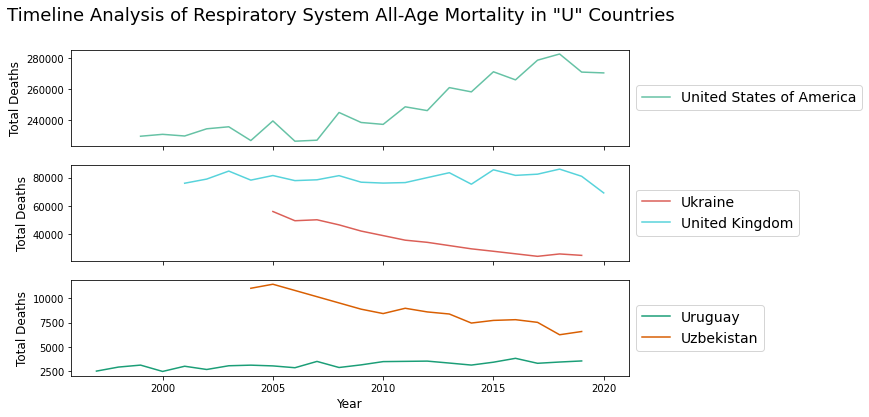

In [27]:
#creation of subplots with a shared x-axis 
f, axs = plt.subplots(3, 1, figsize=(10, 6), sharex = True)

#each axis contains a different dataframe
ax1 = sns.lineplot(x = top_mort.Year, y = top_mort.Total_deaths, hue = top_mort.Country, ax = axs[0], palette = 'Set2' , markers = True, dashes = False)
ax2 = sns.lineplot(x = mid_mort.Year, y = mid_mort.Total_deaths, hue = mid_mort.Country, ax = axs[1], palette = 'hls')
ax3 = sns.lineplot(x = lower_mort.Year, y = lower_mort.Total_deaths, hue = lower_mort.Country, ax = axs[2], palette = 'Dark2')

axs[0].set_ylabel('Total Deaths', fontsize=12)
axs[1].set_ylabel('Total Deaths', fontsize=12)
axs[2].set_ylabel('Total Deaths', fontsize=12)
axs[2].set_xlabel('Year', fontsize=12)

#location of legend for each plot
ax1.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1, fontsize = 14)
ax2.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1, fontsize = 14)
ax3.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1, fontsize = 14)

#overarching title for all subplots 
f.suptitle('Timeline Analysis of Respiratory System All-Age Mortality in \"U\" Countries', fontsize=18)

A list containing all five ICD-10 zip files was created, iterated through, and the resulting data frames were appended to a new list. From this list a new data frame was created containing data from all five ICD-10 files. 143 unique rows, containing country-specific data, were merged onto this new data frame. To avoid duplicate counts, territory-specific United Kingdom data were dropped from analysis. Of the 143 countries, only countries that begin with the letter ‘U’ will be evaluated. Furthermore, only diseases contained within the diseases of the respiratory system chapter of ICD-10 (ICD-10 codes: 1072-1077) will be examined.  Total all-age death was calculated  for each respiratory disease. It is important to note that COVID-19 data was not included in respiratory analysis, and therefore is not reflected in total death count. Data for the United Arab Emirates was dropped from visualization because it contained only two datapoints. The data was then plotted as a timeline graph. 

Over time, the United States has reported the largest total number of respiratory deaths to the WHO. This is to be expected as the population of the United States trumps that of other 'U' countries. Countries with smaller population sizes, such as Uzbekistan and Uruguay, tend to report fewer deaths. Moreover, there is a steady increase in reported deaths for the US as time progresses. This may be reflective of the external factors, such as increases in population size or changes in population behavior. Additionally, this rise may reflect the decline of older generations who smoked more heavily than current ones, and who had lasting lung damage due to this behavior. The United Kingdom, like Uruguay, maintains a steady reported death total until the late 2010s where deaths decline. Similar decline is seen in the United States around the same time. The decrease in reported respiratory deaths may be attributed to a decline in younger generations’ participation in lung-damaging activities. It is also interesting to note that around the same time of decline both the United Kingdom and United States experienced major political shifts that may have affected population numbers; lower population could be reflected in reported deaths. Both Ukraine and Uzbekistan see a decline in reported deaths. This decline may be reflective of external factors, such increased access to health care or changes in population behavior, i.e., reduction in smoking. 

### Question 4. Country overview

In [28]:
#applying a lambda function to find the most recent population for a specified country 
#most recent ppopulation is not necesarily 2020 data 
mort_pop2['Year'] = mort_pop2['Country'].map(lambda x: mort_pop2.loc[mort_pop2['Country']== x, 'Year'].max())

In [29]:
# create new df to merge with mort5 
mp2 = mort_pop2.loc[:,('Country', 'name', 'Sex', 'Pop1')]
mp2 = mp2.groupby(['Country', 'name']).apply(lambda x: round(x['Pop1'].sum(),2)).reset_index()
mp2 = mp2.rename(columns = {0:'Total_population'})
#mp2['Country'].nunique()

In [30]:
# for total deaths 
mort_5 = mort5[mort5['Year'] == 2020].iloc[:, 0:10].copy(deep = True)
temp_all1 = mort_5[lambda x: x['Cause'].str.contains('AAA', regex = True)]
temp_all2 = mort_5[lambda x: x['Cause'].str.contains('1000', regex = True)].copy(deep = True)

In [31]:
temp_all = pd.concat([temp_all1, temp_all2])
mort_all = temp_all.groupby(['Country']).apply(lambda subf: subf['Deaths1'].sum()).reset_index()
mort_all = mort_all.rename(columns={0:'Total_deaths_all_causes'})

In [32]:
respmort1 = mort_5[lambda x: x['Cause'].str.contains('^J', regex = True)].copy(deep = True) 
respmort2 =  mort_5[lambda x: x['Cause'].str.contains('107[2-7]{1}', regex = True)].copy(deep = True)
mort5_ = pd.concat([respmort1, respmort2])

In [33]:
#UAE does not have population data, 
#so is excluded from this table as you would not be able to determine rate of death

mort_temp = mort5_[['Country', 'Sex','Deaths1']]
mort_temp = mort_temp.groupby(['Country']).apply(lambda subf: subf['Deaths1'].sum()).reset_index()
mort_temp = mort_temp.rename(columns = {0:'Total_resp_deaths'})


mort_m = mp2.merge(mort_temp, how ='inner', on ='Country')
mort_merg = mort_m.merge(mort_all, how ='inner', on ='Country')
mort_merg

,Country,name,Total_population,Total_resp_deaths,Total_deaths_all_causes
0,1300,Mauritius,6.529642e+07,1206,11060
1,2140,Costa Rica,8.993851e+07,1642,25996
2,2180,Ecuador,2.044335e+08,11677,115516
3,2250,Guatemala,1.502808e+08,6390,96001
4,2310,Mexico,2.291178e+09,95168,1069958
5,2450,United States of America,1.301296e+10,270506,3383729
6,3150,Israel,3.416974e+08,4241,48797
7,3285,Oman,1.318720e+07,517,10526
8,3320,Qatar,3.471178e+07,315,2734
9,3325,Republic of Korea,1.703525e+09,36368,304948


In [34]:
#death rate = (number of deaths / the total population) * a standard population size, e.g. 100000

mort_merg['death_resp_rate'] = round((mort_merg['Total_resp_deaths'] \
                           / mort_merg['Total_population'] \
                          * 100000),2)
mort_merg

,Country,name,Total_population,Total_resp_deaths,Total_deaths_all_causes,death_resp_rate
0,1300,Mauritius,6.529642e+07,1206,11060,1.85
1,2140,Costa Rica,8.993851e+07,1642,25996,1.83
2,2180,Ecuador,2.044335e+08,11677,115516,5.71
3,2250,Guatemala,1.502808e+08,6390,96001,4.25
4,2310,Mexico,2.291178e+09,95168,1069958,4.15
5,2450,United States of America,1.301296e+10,270506,3383729,2.08
6,3150,Israel,3.416974e+08,4241,48797,1.24
7,3285,Oman,1.318720e+07,517,10526,3.92
8,3320,Qatar,3.471178e+07,315,2734,0.91
9,3325,Republic of Korea,1.703525e+09,36368,304948,2.13


In [35]:
mort_sorted = mort_merg.sort_values(by = 'death_resp_rate', ascending=False, kind ='quicksort', na_position ='last')
mort_top10 = mort_sorted.head(10).set_index('Country')
mort_top10

,name,Total_population,Total_resp_deaths,Total_deaths_all_causes,death_resp_rate
Country,,,,,
4275,San Marino,6.371530e+05,64,343,10.04
2180,Ecuador,2.044335e+08,11677,115516,5.71
4008,Andorra,8.748865e+05,48,419,5.49
4025,Bosnia and Herzegovina,4.963956e+07,2256,44427,4.54
2250,Guatemala,1.502808e+08,6390,96001,4.25
2310,Mexico,2.291178e+09,95168,1069958,4.15
4273,Serbia,1.674987e+08,6715,116850,4.01
3285,Oman,1.318720e+07,517,10526,3.92
4182,Kazakhstan,6.343190e+08,23034,161333,3.63


Three separate data frames were created for each parameter of the summary table and merged. First, population for each country was isolated by finding the max year. After isolating data for the most recent recorded population, the total population was found. Next, all-cause mortality was isolated and its total calculated. Values from respiratory-related deaths were isolated and the total found. The resulting data frame contained columns that allowed for the calculation of the death rate for each country. According to the WHO, the death rate is equal to the total number of a population divided by the total number of this population, expressed per 100,000 for a given year. A new column containing death rate was added and the data frame was sorted by descending death rate. The top 10 countries by death rate are shown. 

San Marino had the highest death rate (10.4), followed by Ecuador (5.71), and Andorra (5.49). San Marino’s and Andorra’s high death rates may be reflective of their small population and high total respiratory deaths, and not necessarily their healthcare system or population’s behaviors. Other countries included in the top ten, such as Ecuador and Mexico, have a culture of a smoking, which may contribute to a larger respiratory death rate despite large populations. Moreover, “developing” countries, such as Kazakhstan and Guatemala, may not have the resources available to maintain healthcare practices that could prevent respiratory deaths, which may contribute to the large death rate among other factors. 

### Question 5. Function

In [36]:
#creating a mask and temporary dataframe to find info for new dataframe that will return result 

def findmortdata(icd10_code, currentdf, country_code, year_start, year_end):
    mask = (currentdf['Year'] >= year_start) & (currentdf['Year'] <= year_end)
    tempdf = currentdf.loc[mask]
    newdf = tempdf[(tempdf['Country'] == country_code) \
                      & (tempdf['Cause'].str.contains(icd10_code))]
    return newdf

In [37]:
#UK - 22 rows
findmortdata('J180', morticd10, 4308, 2010, 2020)

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
2929706,4308,NaN,NaN,2010,104,J180,1,0,1,5439,...,575.0,986.0,1341.0,1021.0,585.0,0.0,0.0,0.0,1.0,5.0
2929707,4308,NaN,NaN,2010,104,J180,2,0,1,8856,...,569.0,1225.0,2145.0,2241.0,1979.0,0.0,0.0,0.0,0.0,3.0
2934472,4308,NaN,NaN,2011,104,J180,1,0,1,5451,...,520.0,997.0,1342.0,1153.0,554.0,0.0,0.0,0.0,0.0,7.0
2934473,4308,NaN,NaN,2011,104,J180,2,0,1,8675,...,503.0,1129.0,2092.0,2318.0,1926.0,0.0,0.0,0.0,0.0,1.0
2939340,4308,NaN,NaN,2012,104,J180,1,0,1,5606,...,568.0,950.0,1357.0,1265.0,633.0,0.0,0.0,0.0,0.0,7.0
2939341,4308,NaN,NaN,2012,104,J180,2,0,1,8572,...,498.0,1152.0,1955.0,2493.0,1898.0,0.0,0.0,0.0,0.0,5.0
3749942,4308,NaN,NaN,2013,104,J180,1,0,1,5442,...,556.0,965.0,1239.0,1260.0,585.0,0.0,0.0,0.0,0.0,9.0
3749943,4308,NaN,NaN,2013,104,J180,2,0,1,8292,...,509.0,1041.0,1887.0,2432.0,1838.0,0.0,0.0,0.0,0.0,4.0
3754754,4308,NaN,NaN,2014,104,J180,1,0,1,5042,...,518.0,854.0,1168.0,1140.0,501.0,0.0,0.0,0.0,0.0,0.0
3754755,4308,NaN,NaN,2014,104,J180,2,0,1,7210,...,447.0,962.0,1573.0,2090.0,1468.0,0.0,0.0,0.0,0.0,3.0


In [38]:
#France - 16 rows
findmortdata('J180', morticd10, 4080, 2010, 2020)

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
2649566,4080,NaN,NaN,2010,104,J180,1,0,1,720,...,68.0,149.0,223.0,115.0,85.0,0.0,0.0,0.0,0.0,2.0
2649567,4080,NaN,NaN,2010,104,J180,2,0,1,1038,...,52.0,137.0,296.0,208.0,309.0,0.0,0.0,0.0,0.0,0.0
2654398,4080,NaN,NaN,2011,104,J180,1,0,1,682,...,64.0,130.0,193.0,149.0,71.0,0.0,0.0,0.0,0.0,0.0
2654399,4080,NaN,NaN,2011,104,J180,2,0,1,845,...,50.0,112.0,196.0,218.0,243.0,0.0,0.0,0.0,0.0,0.0
2658968,4080,NaN,NaN,2012,104,J180,1,0,1,786,...,65.0,142.0,232.0,185.0,96.0,0.0,0.0,0.0,0.0,0.0
2658969,4080,NaN,NaN,2012,104,J180,2,0,1,1124,...,45.0,114.0,304.0,343.0,279.0,0.0,0.0,0.0,0.0,0.0
3537163,4080,NaN,NaN,2013,104,J180,1,0,1,683,...,54.0,107.0,183.0,208.0,78.0,0.0,0.0,0.0,0.0,0.0
3537164,4080,NaN,NaN,2013,104,J180,2,0,1,958,...,34.0,114.0,237.0,324.0,219.0,0.0,0.0,0.0,0.0,0.0
3541800,4080,NaN,NaN,2014,104,J180,1,0,1,630,...,53.0,113.0,167.0,171.0,79.0,0.0,0.0,0.0,0.0,0.0
3541801,4080,NaN,NaN,2014,104,J180,2,0,1,862,...,36.0,87.0,215.0,302.0,195.0,0.0,0.0,0.0,0.0,0.0


First a blank function was created with the following inputs: ICD-10 code, current merged data frame, country code, year (start), and year (end). Within the function a mask containing data from years of interest was created. From there, a temporary data frame was created using the mask and the user’s current merged data frame. The temporary data frame is utilized to locate the values for the country and cause of interest; the isolated values are stored in a new data frame. The new data frame, containing all values of interest, is returned to the user. To return data for mortality caused by Pneumonia (J180) in the United Kingdom (UK) and France for each year between 2010-2020, country-specific codes were placed inside the function.  

The resulting data frame for the UK contained 22 rows, while the resulting data frame for France contained 16; the UK reports more years where pneumonia is a cause of mortality than France. Moreover, the total UK deaths for all ages is consistently higher than the deaths reported by France. The difference in reported total mortalities may be reflected by the different climates of each country. While both the UK and France are temperate, the UK is also damp. The combination of damp and cold may weaken the immune system, resulting in a higher number of the population contracting disease. Larger or smaller reported pneumonia deaths may be reflective of climate changes in each respective country. 

### Question 6. Scatter plot of COVID-19

In [39]:
#use morticd10 code to locate ICD10 code for COVID-19: 'U071'
covid_1 = morticd10[(morticd10['Cause'] == 'U071')]

#groupby country and find total deaths for all ages ('Deaths1')
covid_2 = covid_1.groupby(['Country']).apply(lambda subf: subf['Deaths1'].sum()).reset_index()

#rename the Deaths1 column to a more readable name
covid_2 = covid_2.rename(columns = {0:'Total_covid_deaths'})

#covid_2.head()

In [40]:
#addinfo.head()
#to merge the dataframe containing additional info
#a slight name change must be made
addinfo = addinfo.rename(columns = {'country':'Country'})

#dataframe containing additional econometric info for che-gdp is isolated
addinfo_chepc = addinfo[['Country', 'che_gdp']]

In [41]:
#the df containing che_gpd info is merged with the df containing covid data
che_covid = mp2.merge(covid_2,on = 'Country').merge(addinfo_chepc,on = 'Country')
che_covid

,Country,name,Total_population,Total_covid_deaths,che_gdp
0,1300,Mauritius,6.529642e+07,10,6.7
1,2140,Costa Rica,8.993851e+07,2276,7.9
2,2180,Ecuador,2.044335e+08,15490,8.5
3,2250,Guatemala,1.502808e+08,7428,6.5
4,2310,Mexico,2.291178e+09,146834,6.2
5,2450,United States of America,1.301296e+10,350831,18.8
6,3150,Israel,3.416974e+08,3149,8.3
7,3285,Oman,1.318720e+07,1453,5.3
8,3325,Republic of Korea,1.703525e+09,946,8.4
9,4010,Austria,5.481673e+08,6224,12.2


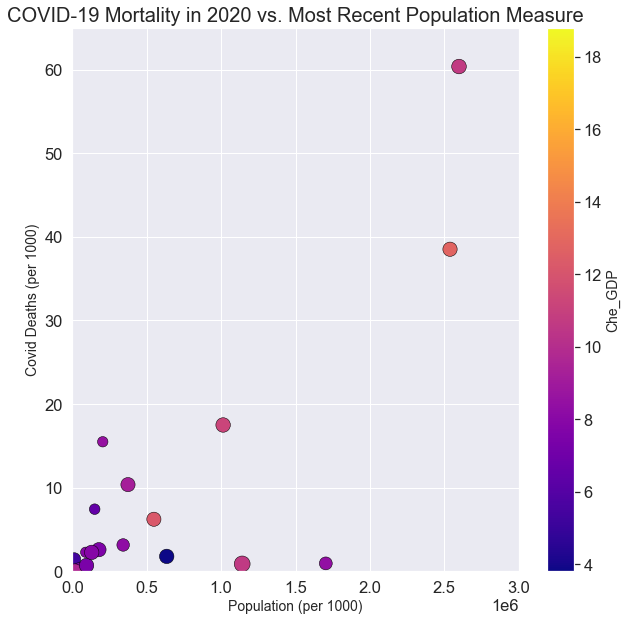

In [82]:
#a scatter plot is made using the df created in the previous kernel 

fig, ax = plt.subplots(figsize = (10, 10))

#creating x and y variables for population and covid deaths - written per 1000 individuals
x = (che_covid['Total_population'] / 1000) 
y = (che_covid['Total_covid_deaths']/1000).astype(float)

# Generate a size variables for each value - scaling it by 0.5 for readability 
mysizes =  che_covid['Country'] *0.05

# Generate a list of colors based on che-gdp
mycolor =  che_covid['che_gdp']

plt.scatter(x, y, s = mysizes, c = mycolor, edgecolor = 'black', linewidth = 0.5, cmap = 'plasma')
plt.title("COVID-19 Mortality in 2020 vs. Most Recent Population Measure", fontsize=20)

#add color made that corresponds to che-gdp 
cbar = plt.colorbar()
cbar.set_label('Che_GDP', fontsize=14)

plt.xlim(0,3000000) #US, UK, and Mexico were dropped as outliers 
plt.ylim(0, 65)
plt.xlabel("Population (per 1000)", fontsize = 14)
plt.ylabel("Covid Deaths (per 1000)", fontsize = 14)
plt.show()

To create a scatter plot of COVID-19 mortality in 2020 (ICD-10 code U071) vs. population size (most recent figure), previously created data frames containing most recent population size and year were utilized. An additional data frame containing mortality data from ICD-10 was used to isolate mortalities from COVID-19. A third additional data frame, containing economic metrics for each country, was merged with the previously two mentioned data frames. The resulting data frame contained information on the current health expenditure (CHE) as a percentage of gross domestic product; CHE-GDP was used as an additional parameter in the scatter plot. 

The US and UK were dropped from the visualization model as both had populations (n=1.30e10, n=4.08e09, respectfully) that fell outside the data majority. Mexico was dropped for a similar reason; its total covid deaths (n=146834) fell outside the data majority. From the remaining data, there appears to be a slight positive association between COVID-19 deaths and populations. As population size increases, the number of COVID-19 deaths increases. However, this cannot be said for certain as most data clusters near the lower end of the population and death spectrum. Moreover, a country’s CHE-GDP does not appear to influence COVID-19 mortalities in 2020. As 2020 marked the start of the pandemic, many countries, including those with a high CHE-GDP did not have structures in place for a major health emergency. However, it will be interesting to see how CHE-GDP affects COVID-19 mortalities in the upcoming years. 

### Question 7. Bar Chart of Mortality

In [43]:
che_covid.sort_values(by = 'Total_covid_deaths', ascending = False, kind = 'quicksort', na_position = 'last').head(10)

,Country,name,Total_population,Total_covid_deaths,che_gdp
5,2450,United States of America,1.301296e+10,350831,18.8
4,2310,Mexico,2.291178e+09,146834,6.2
20,4308,United Kingdom,4.075047e+09,75838,11.9
19,4280,Spain,2.598712e+09,60358,10.7
13,4085,Germany,2.538321e+09,38510,12.8
18,4210,Netherlands,1.013488e+09,17495,11.2
2,2180,Ecuador,2.044335e+08,15490,8.5
10,4045,Czech Republic,3.741021e+08,10366,9.2
3,2250,Guatemala,1.502808e+08,7428,6.5
9,4010,Austria,5.481673e+08,6224,12.2


In [44]:
#U071 covid, top country codes
top10 = [2450, 2310, 4308, 4280, 4085, 4210, 2180, 4045, 2250, 4010]
mort_5 = mort_5.set_index('Country')

In [45]:
mort_5.reset_index()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1
0,4275,NaN,NaN,2020,101,1000,1,9,9,175
1,4275,NaN,NaN,2020,101,1000,2,9,9,168
2,4275,NaN,NaN,2020,101,1001,1,9,9,0
3,4275,NaN,NaN,2020,101,1001,2,9,9,0
4,4275,NaN,NaN,2020,101,1002,1,9,9,0
...,...,...,...,...,...,...,...,...,...,...
82362,5020,NaN,NaN,2020,104,Y870,2,0,1,1
82363,5020,NaN,NaN,2020,104,Y871,1,0,1,3
82364,5020,NaN,NaN,2020,104,Y883,2,0,1,1
82365,5020,NaN,NaN,2020,104,Y899,1,0,1,1


In [47]:
mort_5.set_index('Cause')

,Admin1,SubDiv,Year,List,Sex,Frmat,IM_Frmat,Deaths1
Cause,,,,,,,,
1000,NaN,NaN,2020,101,1,9,9,175
1000,NaN,NaN,2020,101,2,9,9,168
1001,NaN,NaN,2020,101,1,9,9,0
1001,NaN,NaN,2020,101,2,9,9,0
1002,NaN,NaN,2020,101,1,9,9,0
...,...,...,...,...,...,...,...,...
Y870,NaN,NaN,2020,104,2,0,1,1
Y871,NaN,NaN,2020,104,1,0,1,3
Y883,NaN,NaN,2020,104,2,0,1,1


In [49]:
#find the countries at specific index 
top10 = mort_5.loc[[2450, 2310, 4308, 4280, 4085, 4210, 2180, 4045, 2250, 4010]]

In [50]:
top10.reset_index()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1
0,2450,NaN,NaN,2020,104,AAA,1,0,1,1769884
1,2450,NaN,NaN,2020,104,AAA,2,0,1,1613845
2,2450,NaN,NaN,2020,104,A009,2,0,1,1
3,2450,NaN,NaN,2020,104,A020,1,0,1,7
4,2450,NaN,NaN,2020,104,A020,2,0,1,6
...,...,...,...,...,...,...,...,...,...,...
42462,4010,NaN,NaN,2020,104,Y870,2,0,1,1
42463,4010,NaN,NaN,2020,104,Y881,1,0,1,1
42464,4010,NaN,NaN,2020,104,Y883,1,0,1,2
42465,4010,NaN,NaN,2020,104,Y899,1,0,1,46


In [52]:
top10 = top10.loc[(top10['Cause'] != 'AAA')]
#remove 'AAA' - 'AAA' is a sum of all deaths
#want to find top deaths (including COVID-19)
top_deaths = top10.groupby(by ='Cause', axis = 0)['Deaths1'].sum().reset_index()
#resulting DF gives rise to the top cause ICD-10 codes
top_deaths.sort_values(by = 'Deaths1', ascending = False).head()

,Cause,Deaths1
4271,U071,729374
2002,I219,354635
2007,I251,258128
565,C349,252119
1472,F03,217999


In [53]:
#reset index
top10 = top10.reset_index()
top10

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1
0,2450,NaN,NaN,2020,104,A009,2,0,1,1
1,2450,NaN,NaN,2020,104,A020,1,0,1,7
2,2450,NaN,NaN,2020,104,A020,2,0,1,6
3,2450,NaN,NaN,2020,104,A021,1,0,1,20
4,2450,NaN,NaN,2020,104,A021,2,0,1,13
...,...,...,...,...,...,...,...,...,...,...
42441,4010,NaN,NaN,2020,104,Y870,2,0,1,1
42442,4010,NaN,NaN,2020,104,Y881,1,0,1,1
42443,4010,NaN,NaN,2020,104,Y883,1,0,1,2
42444,4010,NaN,NaN,2020,104,Y899,1,0,1,46


In [54]:
#set index as cause to locate specific top 5 ICD-10 code 
top10 = top10.set_index('Cause')

In [55]:
#locating excact values 
top10 = top10.loc[['U071', 'I219', 'I251', 'C349', 'F03']]

In [56]:
#reset index
top10 = top10.reset_index()#.drop(columns = ['index'], axis=1)
#top10

In [57]:
#iterating through cause list in order to give name to codes 
ten_list = list(top10['Cause'])
condition = []

for code in ten_list:
    if re.findall('U071', code):
        condition.append('Covid-19')
    elif re.findall('I219', code):
        condition.append('Acute myocardial infarction')
    elif re.findall('I251', code):
        condition.append('Atherosclerotic heart disease')
    elif re.findall('C349', code):
        condition.append('MN of bronchus or lung')
    elif re.findall('F03', code):
        condition.append('Unspecified dementia')

In [58]:
#create a new column within the top10 dataframe that contains condition
top10['Condition'] = condition

#merge top10 dataframe with country codes to get country names 
top10 = top10.merge(mort_country_codes, on = 'Country')

In [59]:
#new df covid 20 is created from top10
covid_20 = top10.groupby(['name','Condition']).apply(lambda subf: subf['Deaths1'].sum())
covid_20

name                      Condition                    
Austria                   Acute myocardial infarction        3657
                          Atherosclerotic heart disease      6125
                          Covid-19                           6224
                          MN of bronchus or lung             3582
                          Unspecified dementia               2282
Czech Republic            Acute myocardial infarction        1817
                          Atherosclerotic heart disease      2313
                          Covid-19                          10366
                          MN of bronchus or lung             2391
                          Unspecified dementia                395
Ecuador                   Acute myocardial infarction       14931
                          Atherosclerotic heart disease        54
                          Covid-19                          15490
                          MN of bronchus or lung              709
                    

In [60]:
#pivoting the dataframe for ease of visiualization 
covid_2020 = covid_20.unstack()
covid_2020

Condition,Acute myocardial infarction,Atherosclerotic heart disease,Covid-19,MN of bronchus or lung,Unspecified dementia
name,,,,,
Austria,3657,6125,6224,3582,2282
Czech Republic,1817,2313,10366,2391,395
Ecuador,14931,54,15490,709,110
Germany,32909,62900,38510,41759,45492
Guatemala,7750,40,7428,445,56
Mexico,152953,1615,146834,6548,1212
Netherlands,4281,1207,17495,9960,9200
Spain,12995,1333,60358,21458,18308
United Kingdom,23114,12686,75838,32973,35703


In [61]:
stacked_covid = covid_2020.apply(lambda x: x*100/sum(x), axis = 1)
stacked_covid

Condition,Acute myocardial infarction,Atherosclerotic heart disease,Covid-19,MN of bronchus or lung,Unspecified dementia
name,,,,,
Austria,16.721536,28.006401,28.459076,16.378601,10.434385
Czech Republic,10.513829,13.383868,59.981484,13.835204,2.285615
Ecuador,47.712021,0.172557,49.498306,2.265610,0.351505
Germany,14.852643,28.388320,17.380512,18.846866,20.531660
Guatemala,49.303391,0.254469,47.254914,2.830969,0.356257
Mexico,49.473415,0.522380,47.494194,2.117983,0.392027
Netherlands,10.158271,2.864058,41.513419,23.633818,21.830434
Spain,11.354105,1.164680,52.736518,18.748471,15.996225
United Kingdom,12.818750,7.035505,42.058853,18.286434,19.800459


Text(0.5, 1.0, 'Covid-19 Mortality vs. Other Leading Causes in Countries with Top Covid-19 Deaths in 2020')

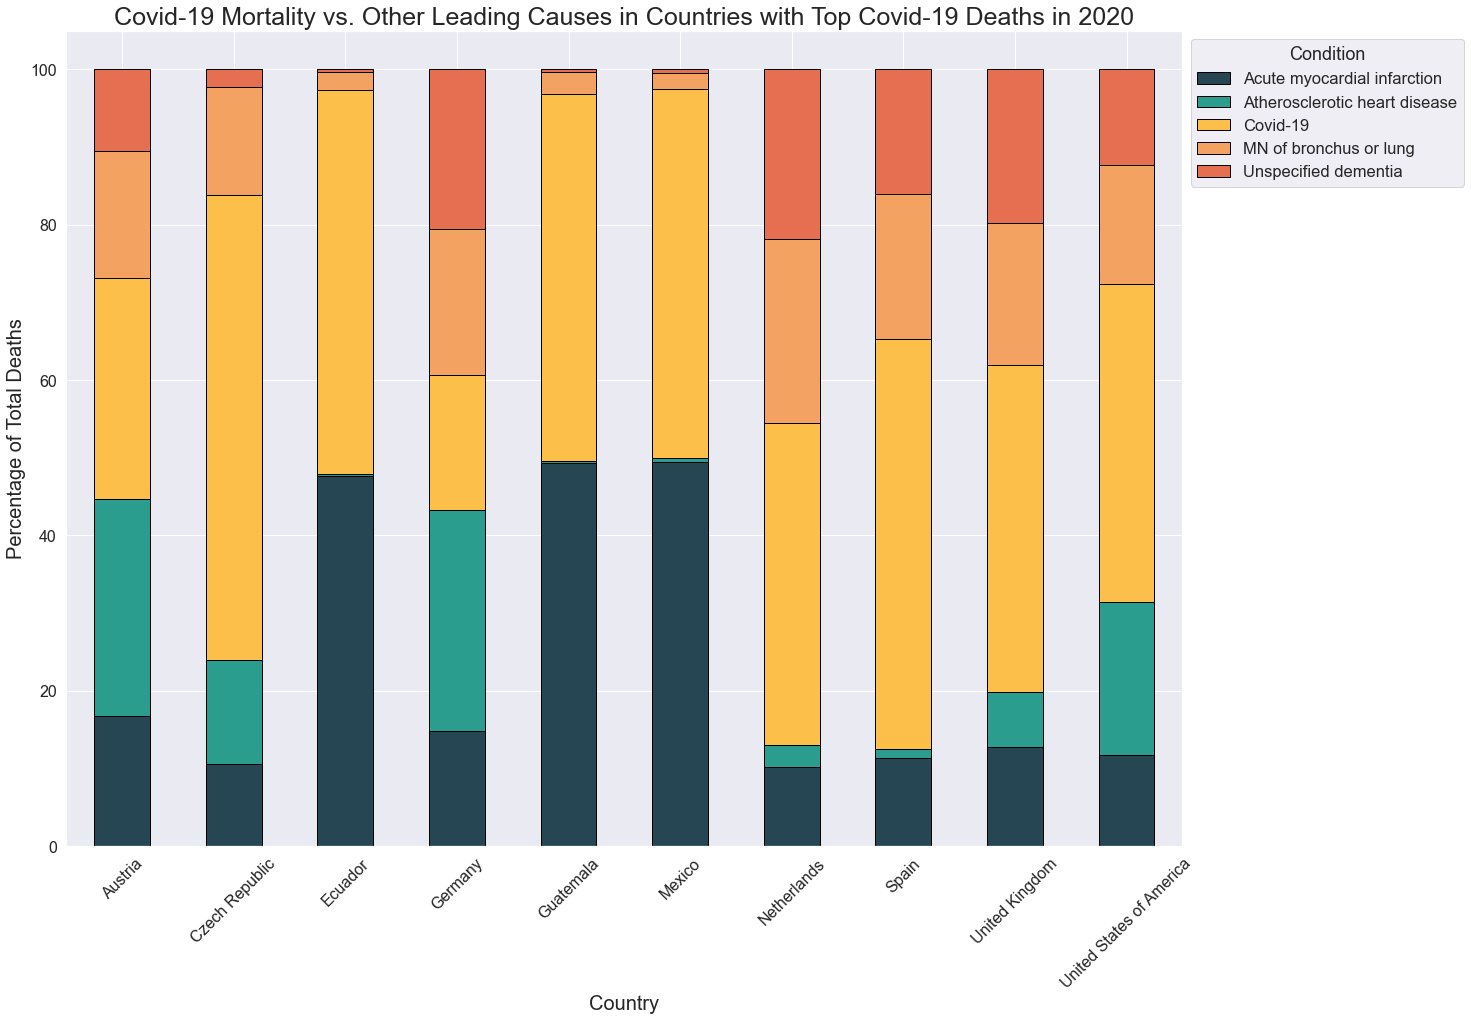

In [86]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.set(font_scale = 1.5)
shades =['#264653', '#2a9d8f', '#fcbf49', '#f4a261', '#e76f51']
stacked_covid.plot(kind = 'bar', stacked = True, color = shades, ax = ax, edgecolor = "black", fontsize=16)
plt.xticks(rotation = 45)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1, 1))
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Percentage of Total Deaths', fontsize = 20)
plt.title('Covid-19 Mortality vs. Other Leading Causes in Countries with Top Covid-19 Deaths in 2020', fontsize = 25)

Using the data frame created in question 6, the top 10 countries with the highest total COVID-19 deaths were found. A list was created with the country’s assigned country code. The list was used to locate country data within a data frame containing ICD-10 mortalities. All-cause mortality was dropped from the data frame. For ease of analysis, top causes of death were not found for each individual country; top causes were found across all top 10 country data. The corresponding ICD-10 codes for the top 5 other causes of mortality were then used to isolate country data for those specific causes. For ease of readability, ICD-10 codes were changed to their corresponding cause. For each country, the total number of deaths for each cause was calculated. Percentage of total death for each cause was found for each country. A stacked bar chart was created to compare the mortality of COVID-19 deaths with other leading causes of mortality in those countries. 

Most countries, apart from Guatemala and Mexico, reported COVID-19 as the leading cause of death in 2020. The Czech Republic had the largest proportion of COVID-19 deaths (59.98%) relative to other leading causes, while Germany had the lowest (17.38%). Germany and the Czech Republic took similar courses of actions when the pandemic hit; both closed their boarders, preventing movement in and out of the country, and diminishing their respective population’s exposure to the virus. Although both eventually eased restrictions, only Germany chose to reinstate lockdown mandates when the second wave of the pandemic hit in autumn 2020. The lack of action by the Czech Republic may be reflected in its high proportion of COVID-19 deaths. Guatemala and Mexico saw the highest proportion of death by acute myocardial infraction (49.30% and 49.47%, respectfully), barely edging out COVID-19. It is interesting to note that COVID-19 can increase risk of heart attack, so that may be reflected in the high proportion of myocardial deaths. Lastly, Germany, the Netherlands, Spain, UK, and US had a large proportion of total deaths attributed to unspecified dementia. This may be explained by the increasing life span and decreasing birth rate seen in many developed countries. 

### Question 8. Object Orientation

In [63]:
class Country:
    def __init__(self, c, n, m, f):
        self.code = c # country code
        self.name = n # name of country
        self.male = m # male COVID-19 deaths
        self.female = f #female COVID-19 deaths
        self.total = int(m+f) # sum of male and female deaths 
    
    def _str_(self):
        return self.code, self.name #to return country code and name
    
    def total_covid_deaths(self):
        return self.total #returns total covid mortalities 

In [64]:
class Region:
    def __init__(self, c, n):
        self.code = c # region code
        self.name = n # region name
        self.countries = [] # empty list to contain country total covid mortalities
        
    def add(self, country): # add country to region 
        for item in country:
            self.countries.append(item.total_covid_deaths()) # gets covid mortalities from country
        
    def total_covid_deaths(self):
        total = sum(self.countries) # sum of total mortalities for all countries in region
        return total

In [65]:
class World:
    def __init__(self, n):
        self.name = n # world name
        self.regions = [] # empty list to contain regions 
        
    def add(self, region): # add region to world 
        self.regions.append(region.total_covid_deaths()) # gets covid mortalities for region
        
    def total_covid_deaths(self):
        total = sum(self.regions) # sum of total mortalities for all regions in world
        return total

In [66]:
# create data frame that includes all covid-19 data 
o_covid = mp2.merge(covid_1,on='Country')

#adjust df to include only relevant data 
o_covid = o_covid[['Country', 'name', 'Year', 'Cause', 'Sex', 'Deaths1']]
#o_covid

In [67]:
# merge additional to get region info 
oo_covid = o_covid.merge(addinfo)

#isolate columns of importance 
oo_covid = oo_covid.iloc[:, 0:9]
#oo_covid 

In [68]:
# create two separate dataframes by sex 
male = oo_covid[oo_covid['Sex']==1]
female = oo_covid[oo_covid['Sex']==2]

In [69]:
#isolate country and all deaths
male = male[['Country', 'Deaths1']]

#rename deaths1 (all deaths) to male deaths
male = male.rename(columns={'Deaths1':'Male_Deaths'})

In [70]:
# merge male and female dfs 
covid_20 = female.merge(male, on='Country')

#rename deaths1 (all deaths) to female deaths and drop sex column 
covid_20 = covid_20.rename(columns={'Deaths1':'Female_Deaths'}).drop(columns=['Sex'])

In [71]:
#create new covid df containing all data of interest 
covid_20 = covid_20[['Country', 'country_code', 'name', \
                    'Male_Deaths','Female_Deaths', \
                    'region', 'region_name']]

In [72]:
#create a countries list to iterate through
countries_list = covid_20.values.tolist()

In [73]:
#empty lists that will contain Country class objects
africa_c = []
americas_c = []
europe_c = []
east_med_c = []
west_pac_c = []
sear_c = []

for i in range(len(countries_list)):
    c = countries_list[i][1]
    n = countries_list[i][2]
    m = countries_list[i][3]
    f = countries_list[i][4]
    reg = countries_list[i][5]
    if reg == 'AFR':
        ct = Country(c, n, m, f)
        africa_c.append(ct)
    elif reg == 'AMR':
        ct = Country(c, n, m, f)
        americas_c.append(ct)
    elif reg == 'EUR':
        rct = Country(c, n, m, f)
        europe_c.append(ct)
    elif reg == 'EMR':
        ct = Country(c, n, m, f)
        east_med_c.append(ct)
    elif reg == 'WPR':
        ct = Country(c, n, m, f)
        west_pac_c.append(ct)
    elif reg == 'SEAR':
        ct = Country(c, n, m, f)
        sear_c_c.append(ct)    

In [74]:
# proof of concept - ability to extract data from list
for i in range(len(americas_c)):
    print(americas_c[i]._str_())

('CRI', 'Costa Rica')
('ECU', 'Ecuador')
('GTM', 'Guatemala')
('MEX', 'Mexico')
('USA', 'United States of America')


In [75]:
# region class objects  
africa_r = Region('AFR', 'African Region')
americas_r = Region('AMR', 'Region of the Americas')
europe_r = Region('EUR', 'European Region')
east_med_r = Region('EMR', 'Eastern Mediterranean Region')
west_pac_r = Region('WPR', 'Western Pacific Region')
sear_r = Region('SEAR', 'South-East Asian Region')

In [76]:
# adding interaction between class objects 
# Country objects match with Region objects 
africa_r.add(africa_c)
americas_r.add(americas_c)
europe_r.add(europe_c)
east_med_r.add(east_med_c)
west_pac_r.add(west_pac_c)
sear_r.add(sear_c)

In [77]:
print("Total COVID-19 deaths for African region: " + str(africa_r.total_covid_deaths()))
print("Total COVID-19 deaths for Region of Americas: " + str(americas_r.total_covid_deaths()))
print("Total COVID-19 deaths for European region: " + str(europe_r.total_covid_deaths()))
print("Total COVID-19 deaths for Eastern Mediterranean region: " + str(east_med_r.total_covid_deaths()))
print("Total COVID-19 deaths for Western Pacific region: " + str(west_pac_r.total_covid_deaths()))
print("Total COVID-19 deaths for South-East Asian Region': " + str(sear_r.total_covid_deaths()))

Total COVID-19 deaths for African region: 10
Total COVID-19 deaths for Region of Americas: 522855
Total COVID-19 deaths for European region: 362183
Total COVID-19 deaths for Eastern Mediterranean region: 1453
Total COVID-19 deaths for Western Pacific region: 1828
Total COVID-19 deaths for South-East Asian Region': 0


In [78]:
# create World class object 
world = World('World')

#adding interaction between class objects 
world.add(africa_r)
world.add(americas_r)
world.add(europe_r)
world.add(east_med_r)
world.add(west_pac_r)
world.add(sear_r)

#total of covid deaths across world 
print("Total World COVID-19 deaths in 2020: " + str(world.total_covid_deaths()))

Total World COVID-19 deaths in 2020: 888329


World COVID-19 deaths were modeled using an object-oriented approach that comprised of three classes: Country, Region, and Word. First, the Country class was created. The class takes country code, name of country, total male COVID-19 deaths, and total female COVID-19 deaths as instance attributes. A fifth instance attribute is created by adding together male and female deaths (total). Within Country, there are two inner classes; ‘_str_’  returns the Country object’s country code and name and  ‘total_covid_deaths,’ returns the total number of COVID-19 deaths (total) for that country as an integer. 
The second class, Region, takes as instance attributes ‘name’ (region) and ‘code’ (region). A third instance attribute, countries, is an empty list that will take as its values the total number of COVID-19 deaths for each country added to a Region object. The ‘add’ class within Region takes country as an attribute. It appends the total number of COVID-19 deaths to the ‘countries’ list. The third inner class, total_covid_deaths find the sum of the ‘countries’ list and returns this value. 

The third class, World, takes ‘name’ as an instance variable. A second instance attribute, region, is an empty list that will take as its values the total number of COVID-19 deaths across regions. The ‘add’ inner class takes COVID-19 mortalities by region and appends them to the empty ‘regions’ list. The sum of this list is found and returned by the inner class, total_covid_deaths. 

A new data frame containing all sex-specific COVID-19 mortalities by region and country was created and subsequently looped through to create Country class objects. Countries were added to empty lists of the corresponding region. Next, Region class objects were created for each region. Lists containing Country object data specific to a region were added to that region. Lastly, a World class object was created. Region class objects were added to the new World class object. Calling total_covid_deaths on the World class object results in total COVID-19 deaths for 2020. 

The highest calculated COVID-19 death count came from the Region of the Americas (n= 522855) and the lowest from the South-East Asian region (n=0).  Both the African and South-East Asian regions had death counts below 50. These counts may be reflective of  inability to travel during the pandemic as areas of Africa and South-East Asia may require WHO workers to travel to collect non-digital data. The cumulative world total  for COVID-19 deaths is 888329. This number appears low and may be reflective of underreporting or misreporting COVID-19 mortalities. 